In [1]:
import sys
sys.path.append("../")

In [2]:
from src.utils import *

In [3]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
file_path = ("../data/raw/train.csv")

df = load_data(file_path)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df_stats = compute_basic_stats(df)
df_stats

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
missing_values,0.000000,0,140,0.000000,78,124,829.000000,0,335.000000,76,0
percent_missing,0.000000,0.0,1.73525,0.000000,0.966782,1.536936,10.275161,0.0,4.152206,0.941993,0.0
uniques,8068.000000,2,2,67.000000,2,9,15.000000,3,9.000000,7,4
mean,463479.214551,NaN,NaN,43.466906,NaN,NaN,2.641663,NaN,2.850123,NaN,NaN
median,463472.500000,NaN,NaN,40.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
mode,458982.000000,Male,Yes,35.000000,Yes,Artist,1.000000,Low,2.000000,Cat_6,D
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25th_percentile,461240.750000,NaN,NaN,30.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
75th_percentile,465744.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN
max,467974.000000,NaN,NaN,89.000000,NaN,NaN,14.000000,NaN,9.000000,NaN,NaN


### There seems to be a lot of missing values, let's first visualize these missing values to understand them better.

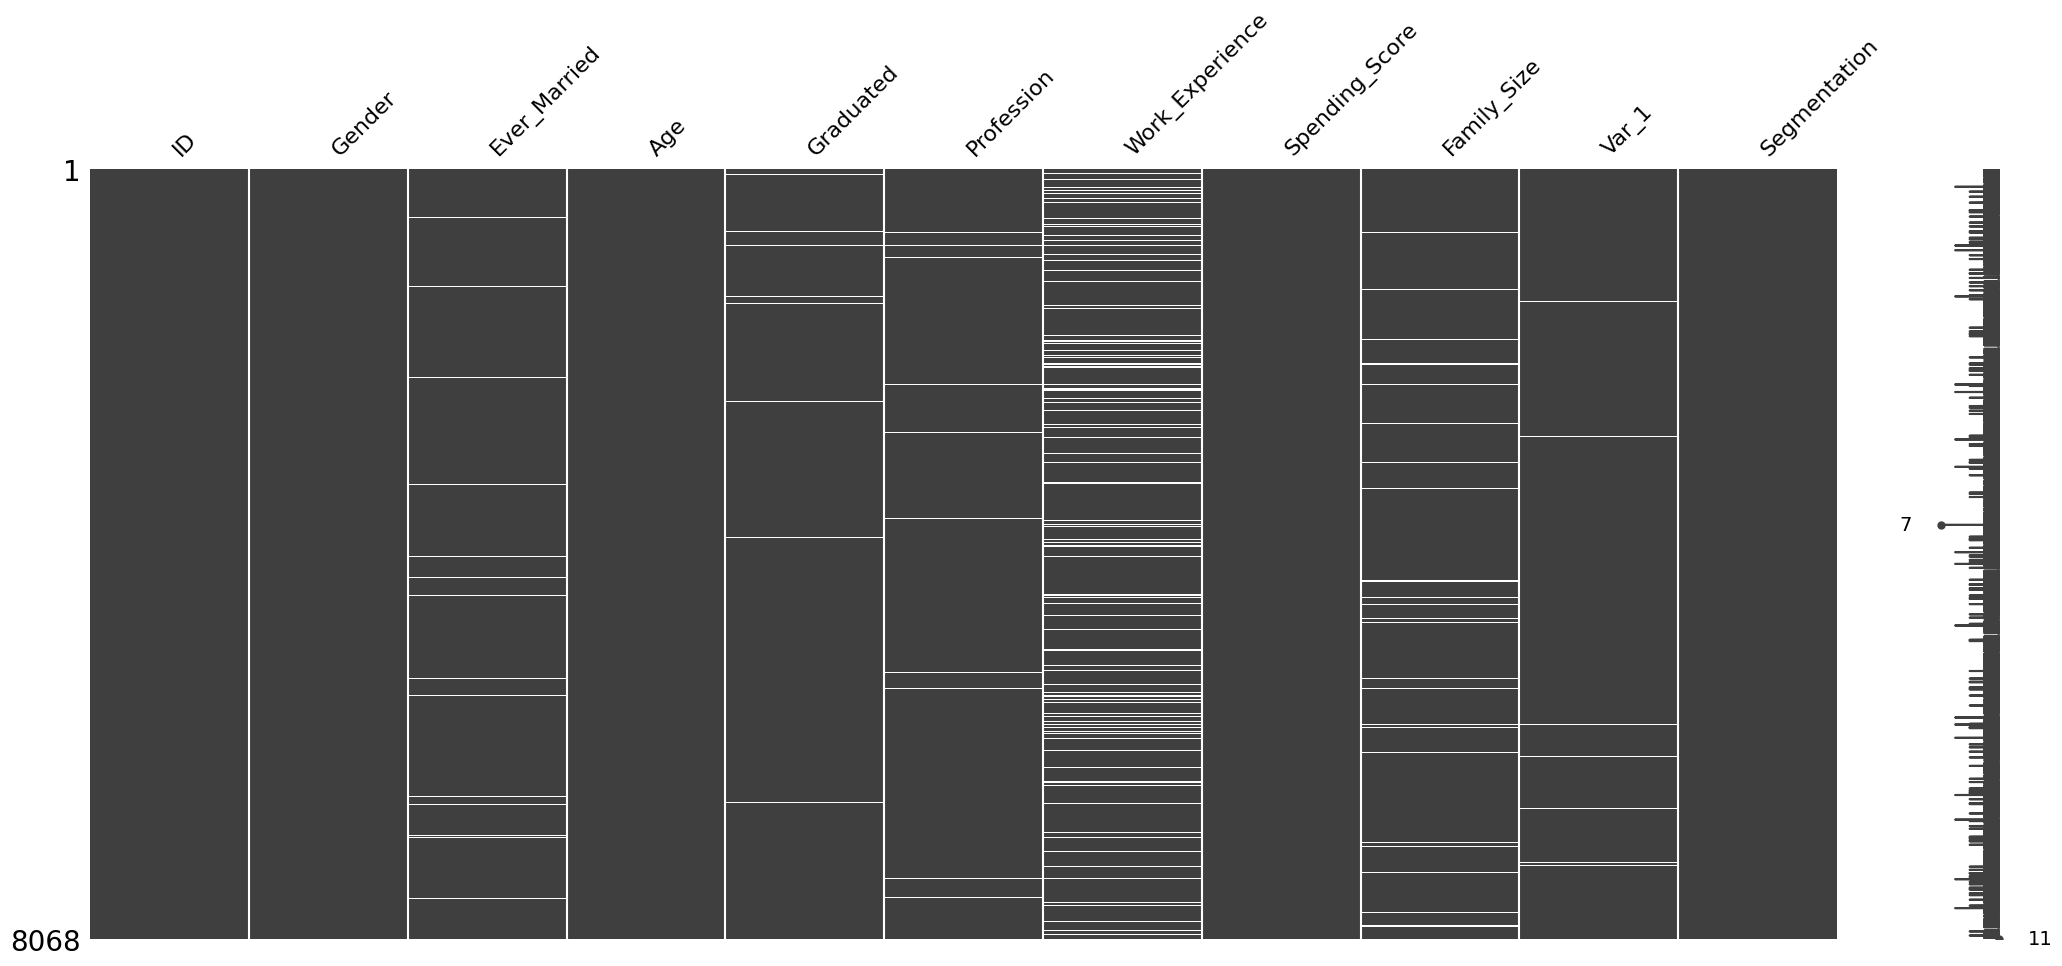

In [6]:
# Plot a missing values matrix using missingno
msno.matrix(df)

# Show the plot
plt.show()

<AxesSubplot: >

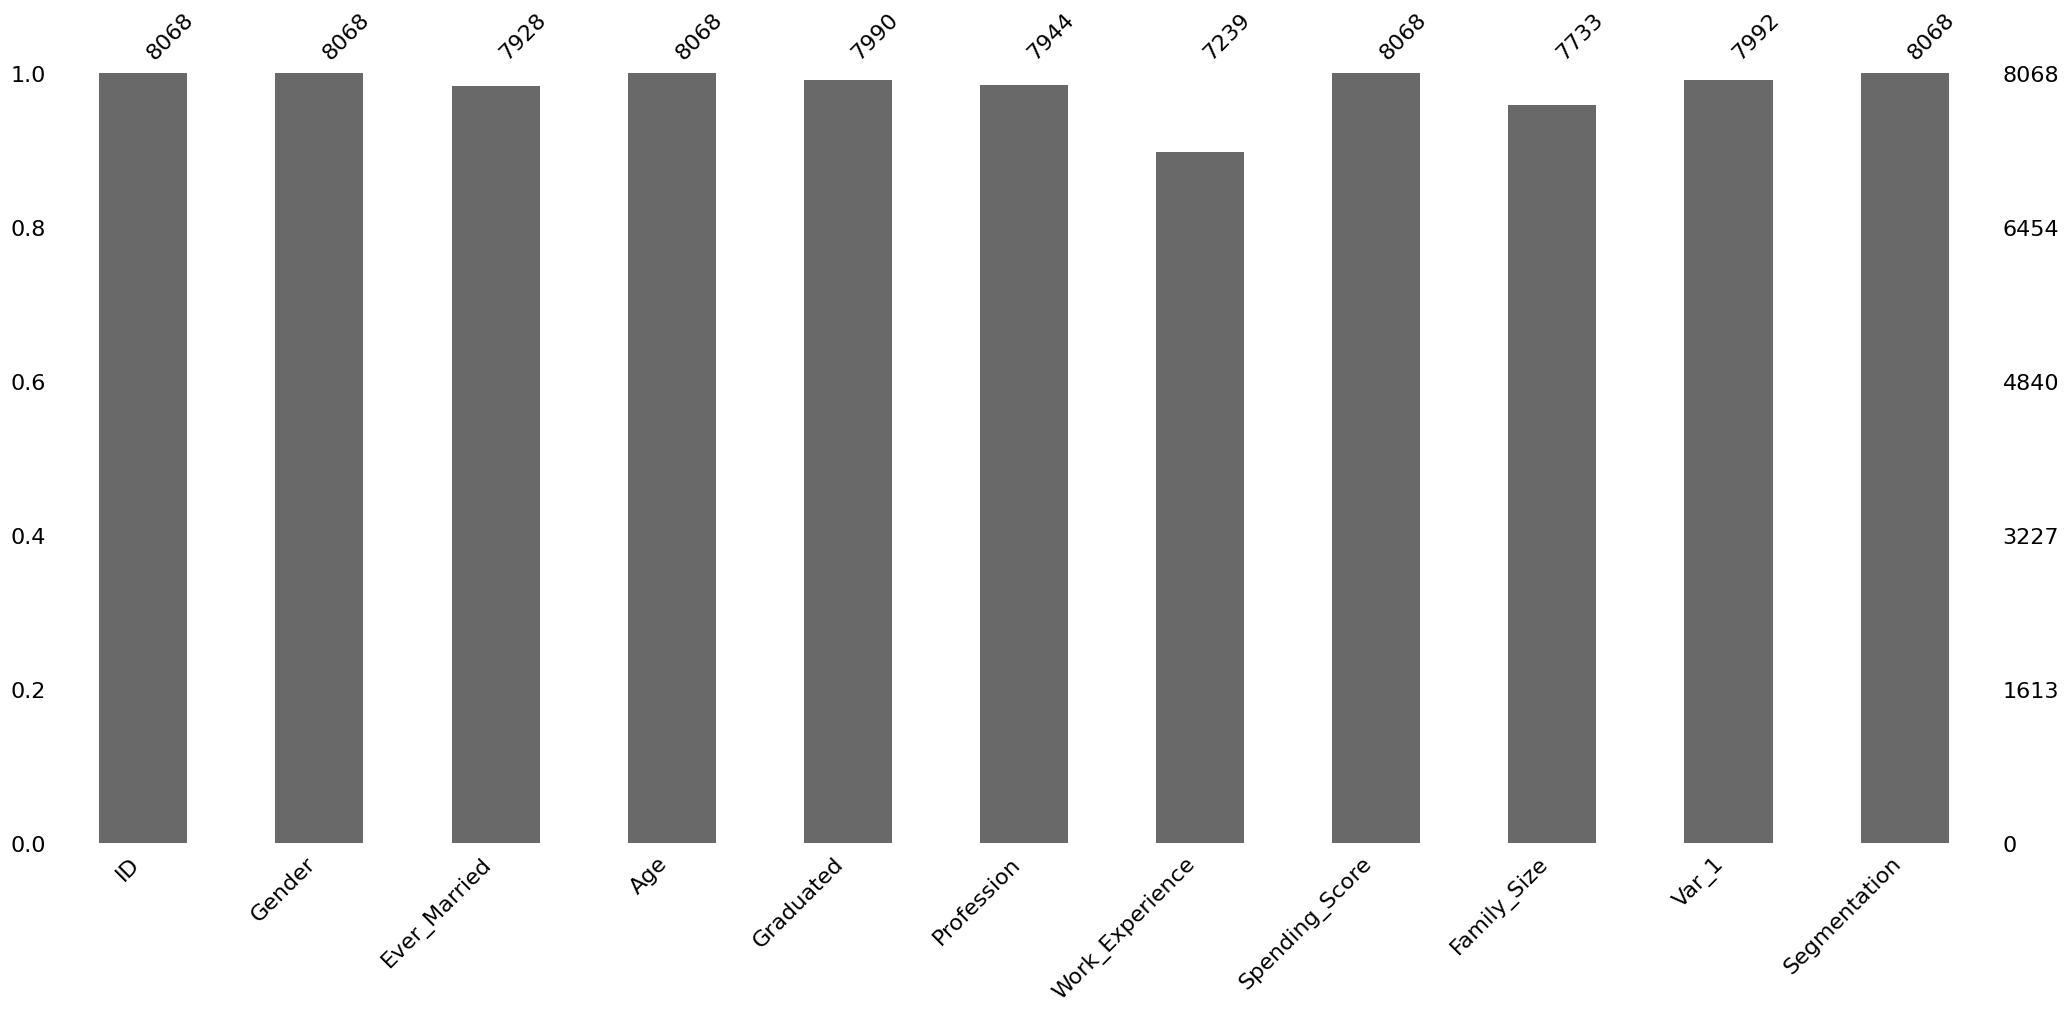

In [7]:
msno.bar(df)

<AxesSubplot: >

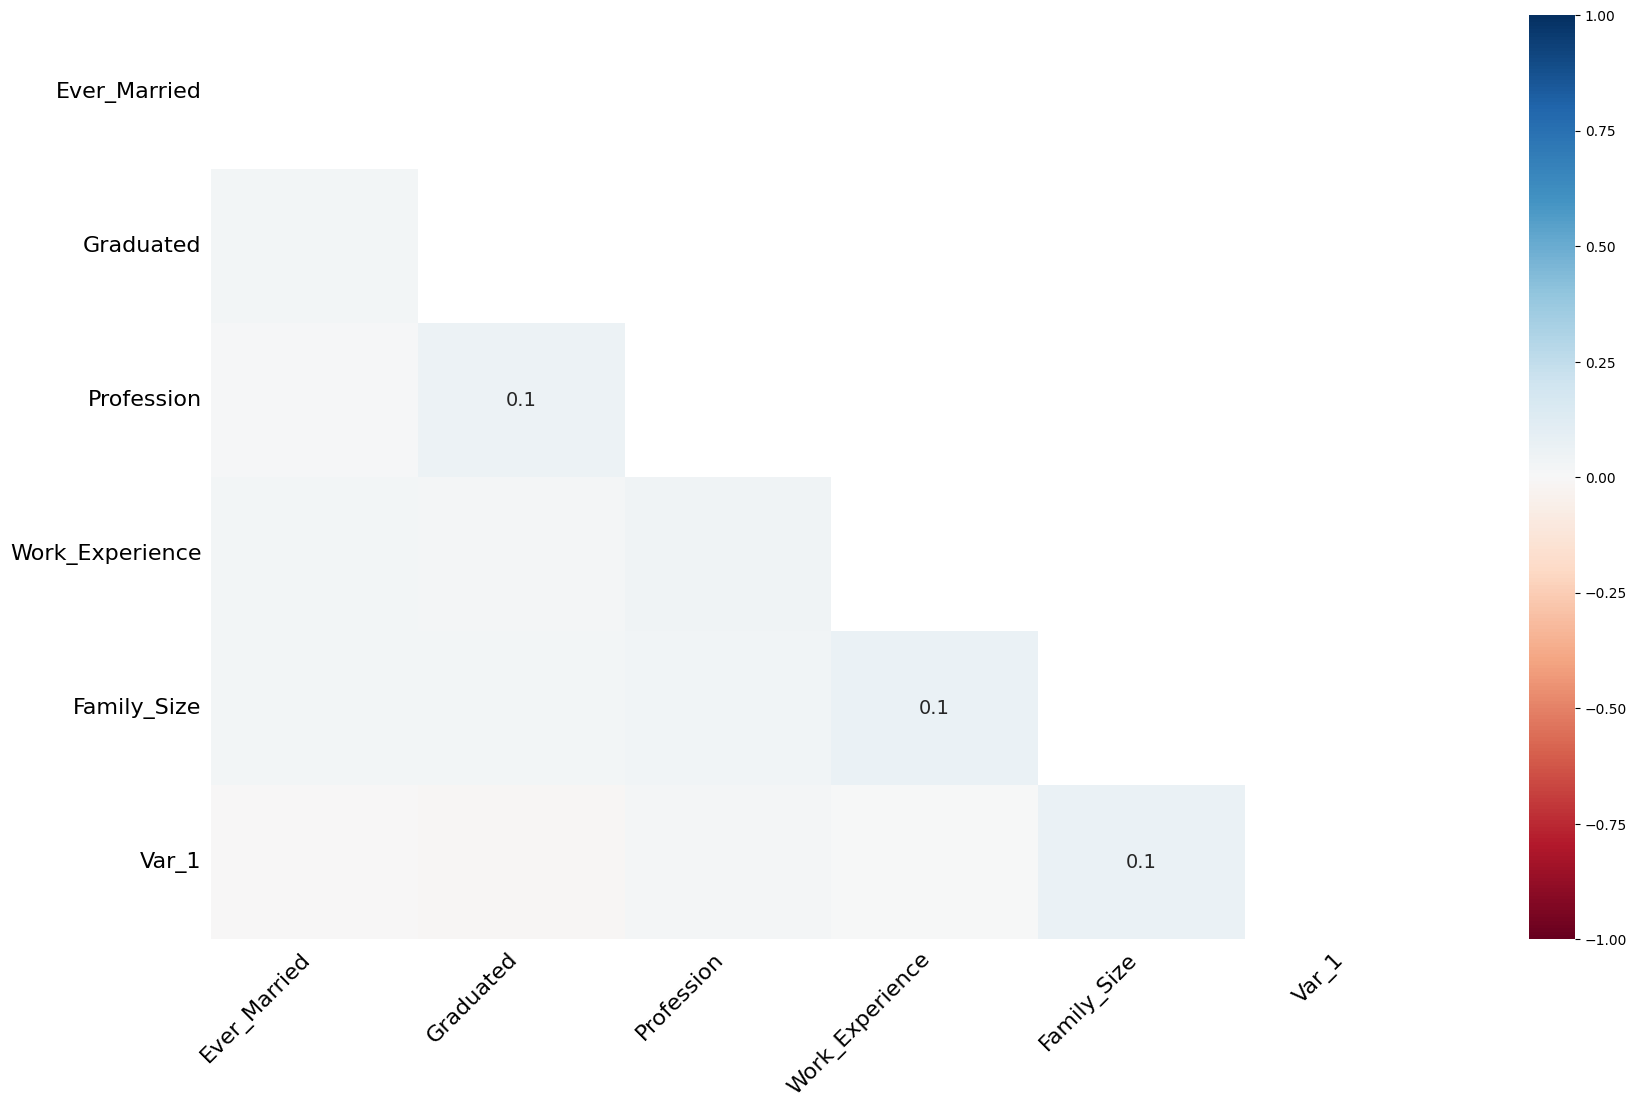

In [8]:
msno.heatmap(df)

### There seems to be no correlation among variables in terms of their completeness so we can inspect each variable independently. 

#### First things first, it would be difficult to simply assume/impute the values for ever_married, graduated, profession, var_1, and family_size without the original information from the source. Since these only account for a small percentage of our dataset, it'd be best to drop them altogether. 

In [9]:
columns = ["Ever_Married", "Graduated", "Profession", "Family_Size", "Var_1"]
df = df.dropna(subset=columns)

<AxesSubplot: >

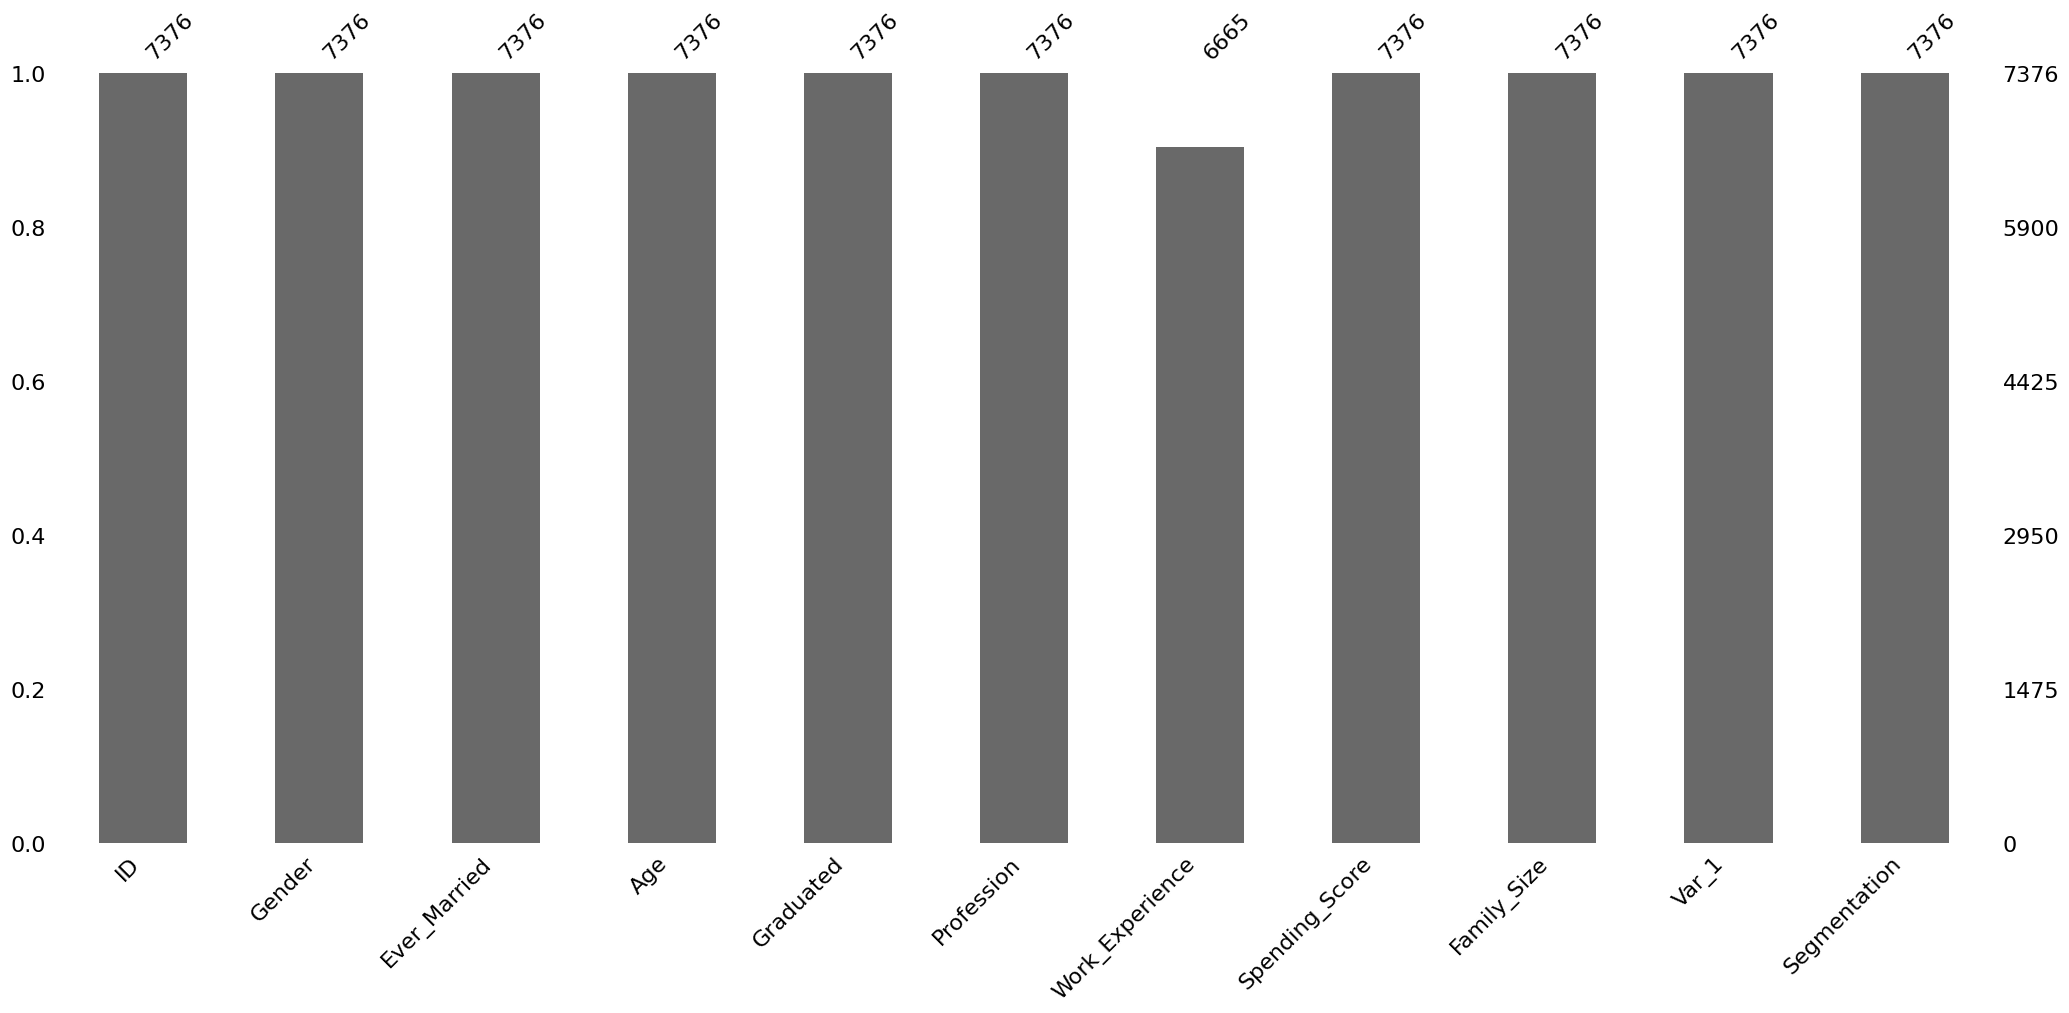

In [10]:
msno.bar(df)

In [11]:
compute_basic_stats(df)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
missing_values,0.000000,0,0,0.000000,0,0,711.000000,0,0.000000,0,0
percent_missing,0.000000,0.0,0.0,0.000000,0.0,0.0,9.639371,0.0,0.000000,0.0,0.0
uniques,7376.000000,2,2,67.000000,2,9,15.000000,3,9.000000,7,4
mean,463474.733595,NaN,NaN,43.531996,NaN,NaN,2.629107,NaN,2.847343,NaN,NaN
median,463459.500000,NaN,NaN,41.000000,NaN,NaN,1.000000,NaN,3.000000,NaN,NaN
mode,458982.000000,Male,Yes,35.000000,Yes,Artist,1.000000,Low,2.000000,Cat_6,D
min,458982.000000,NaN,NaN,18.000000,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
25th_percentile,461292.750000,NaN,NaN,31.000000,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN
75th_percentile,465698.250000,NaN,NaN,53.000000,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN
max,467974.000000,NaN,NaN,89.000000,NaN,NaN,14.000000,NaN,9.000000,NaN,NaN


In [12]:
# Inspecting the Work_Experience column
inspect_column(df, "Work_Experience")

Number of missing values in Work_Experience: 711
Number of unique values in Work_Experience: 15
Unique values in Work_Experience: [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Basic statistics of Work_Experience:
count    6665.000000
mean        2.629107
std         3.405365
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        14.000000
Name: Work_Experience, dtype: float64
Number of outliers in Work_Experience: 176
Outliers in Work_Experience:           ID  Gender Ever_Married  Age Graduated     Profession  \
20    466084    Male          Yes   49       Yes      Homemaker   
22    465602    Male          Yes   33       Yes         Artist   
42    464590  Female           No   27       Yes         Artist   
55    462110    Male          Yes   32       Yes         Artist   
176   464866  Female           No   23        No       Engineer   
...      ...     ...          ...  ...       ...            ...   
7808  460486  Female

#### The work_experience column still contains about 10% of our data, which is quite a lot. However, we cannot perform simple imputation like the mean or median because we cannot simply say that the time a person has worked is related to the mean/median of a group of people's work experience. In the same token, we also cannot avoid the fact that there are outliers already present such as old people with few work experience years stated or professionals that require a lot of work experience (doctors, lawyers, etc.) having only 1 or 2 years in the data. Therefore, I'll be using ML models to predict the imputation. I'll use the KNN imputation to compute the nearest neighbors for each observation with missing values, and replaces the missing value with the average of the K nearest neighbors.

In [13]:
# Get the correlation of work_experience to all other columns

work_corr = get_correlation(df, "Work_Experience")
print(work_corr)

ID                -0.028948
Age               -0.188769
Work_Experience    1.000000
Family_Size       -0.069123
Name: Work_Experience, dtype: float64


/Users/gersongerardcruz/Desktop/customer_segmentation/notebooks/../src/utils.py:152: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()[col_name]


#### It seems we can correlate with age as there is a weak correlation so I'll use KNNImputer for that and check the results after.

In [14]:
columns_for_imputing = ["Age", "Work_Experience"]
df, df_imputed = knn_imputer(df, columns_for_imputing)

In [15]:
df["Work_Experience"] = df['Work_Experience'].round(0)

In [16]:
df

,ID,Gender,Ever_Married,Graduated,Profession,Spending_Score,Family_Size,Var_1,Segmentation,Age,Work_Experience
0,462809,Male,No,No,Healthcare,Low,4.0,Cat_4,D,22.0,1.0
1,462643,Female,Yes,Yes,Engineer,Average,3.0,Cat_4,A,38.0,6.0
2,466315,Female,Yes,Yes,Engineer,Low,1.0,Cat_6,B,67.0,1.0
3,461735,Male,Yes,Yes,Lawyer,High,2.0,Cat_6,B,67.0,0.0
4,462669,Female,Yes,Yes,Entertainment,High,6.0,Cat_6,A,40.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,Yes,Artist,High,5.0,Cat_6,B,41.0,0.0
8064,464685,Male,No,No,Executive,Low,4.0,Cat_4,D,35.0,3.0
8065,465406,Female,No,Yes,Healthcare,Low,1.0,Cat_6,D,33.0,1.0
8066,467299,Female,No,Yes,Healthcare,Low,4.0,Cat_6,B,27.0,1.0


#### Now I'll proceed to EDA

In [22]:
df.to_csv("../data/processed/cleaned_train.csv")